### 数据导入

In [1]:
# 导入pd
import pandas as pd

In [2]:
# 手写数据
df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"],
    }
)

# 另一种写法
df = pd.DataFrame(
    [[4, 7, 10],
     [5, 8, 11],
     [6, 9, 12]],
    index=[1, 2, 3],
    columns=['a', 'b', 'c'])

In [3]:
# 导入数据，并展示头尾几行
titanic = pd.read_csv('titanic.csv')
# transactions = pd.read_json('transactions.txt', lines=True)
titanic.head(5)
# titanic.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 导入数据 - 2
# index_col=0指定第一列为index column
# parse_dates指将日期转化为timestamp类型
air_quality = pd.read_csv("air_quality_no2.csv", index_col=0, parse_dates=True)
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


### 表格整体分析

In [5]:
# 对整张表格统计,返还的结果为df
print(type(titanic.describe()))
titanic.describe()

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 显示每一列的数据类型
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# 显示每一列的数据类型和non null values，其结果也是dataframe
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 具体行列分析

In [8]:
# 提取列, 其结果为pd series
# 方括号内写string。若有多个列则填写list of string.
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [9]:
# 新建一个Series
ages = pd.Series([22, 35, 58], name="Age")
ages

0    22
1    35
2    58
Name: Age, dtype: int64

In [10]:
# 对一列(或一个Series)进行统计
# max, min, mean, median, sum, var, std, abs, cumsum, cumprod
print("Oldest person on boat: ", titanic['Age'].max())
print("Age 25% quantile: ", titanic['Age'].quantile(q=0.25))
print("Length of the age column: ", titanic['Age'].shape)

Oldest person on boat:  80.0
Age 25% quantile:  20.125
Length of the age column:  (891,)


In [11]:
# 显示特定列最大最小的n个值
titanic['Age'].nlargest(3)

630    80.0
851    74.0
96     71.0
Name: Age, dtype: float64

In [12]:
# 显示特定列的不同值数量
titanic['Pclass'].nunique()

3

In [13]:
# 提取多个列
age_sex = titanic[["Age", "Sex"]]
age_sex.head(5)

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male


In [14]:
# 对多个列进行运算
# 这里多个列是dataframe, 因此也可以用.describe()查看
titanic[['Age', 'Fare']].median()

Age     28.0000
Fare    14.4542
dtype: float64

In [15]:
# 利用agg()函数自定义查看的metrics
titanic.agg(
    {
        "Age": ["min", "max", "median", "skew"],
        "Fare": ["min", "max", "median", "mean"],
    }
)

,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
median,28.000000,14.454200
skew,0.389108,NaN
mean,NaN,32.204208


### groupby函数

In [17]:
# groupby
# 顺序：选中列，指定groupby的列，写aggregate function
# 常用agg func：min, max, shift(1) - previous value, shift(-1) - next value
titanic[['Age', 'Sex']].groupby('Sex').mean()

,Age
Sex,
female,27.915709
male,30.726645


In [18]:
# 另一种写法
# 其含义为先用sex列进行groupby, 然后选定age列进行aggregate
titanic.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [19]:
# 也可以用numeric_only来选定列进行aggregate
titanic.groupby('Sex').mean(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [20]:
# 可以指定多个groupby的列
titanic.groupby(['Sex', 'Pclass'])['Fare'].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

In [21]:
# 统计某列的数值分布情况
# count()函数不计入缺失值，但size()会计入缺失值
titanic.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

In [22]:
# 更常用的是直接使用value_counts()函数
titanic['Pclass'].value_counts(dropna=True)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

### 数据筛选

In [23]:
# 通过单列数值筛选行 - 1
# 其中titanic['Age'] > 35的实际值为一列boolean series
# 其他运算符号包括== <= !=
adult_passenger = titanic[titanic['Age'] > 35]
print("Adult passenger count: ", adult_passenger.shape[0])
adult_passenger.head(5)

Adult passenger count:  217


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


In [24]:
# 通过单列数值筛选行 - 2
# 利用isin()来筛选枚举值
class_23 = titanic[titanic['Pclass'].isin([2, 3])]
print("Passenger count from class 2 and 3: ", class_23.shape[0])

# 也可以使用"|"实现同样效果
# 但是注意，条件需要用括号包裹住。例如：(titanic["Pclass"] == 2) 
# "|"表示或，"&"表示并
# class_23 = titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)]

Passenger count from class 2 and 3:  675


In [25]:
# 通过单列数值筛选行 - 3
# 利用notna()来筛选非空值
# 同理，isna()可以筛选空值
age_no_na = titanic[titanic['Age'].notna()]
print("Passenger with valid age: ", age_no_na.shape[0])

Passenger with valid age:  714


In [26]:
# 行列同时筛选 - 1
# loc()函数通过方括号筛选行列，其中第一项为行筛选，第二项为列筛选
# loc()适用于column names, row labels (index)，condition expression
adult_names = titanic.loc[titanic['Age'] > 35, "Name"]
adult_names.head(3)

1     Cumings, Mrs. John Bradley (Florence Briggs Th...
6                               McCarthy, Mr. Timothy J
11                              Bonnell, Miss Elizabeth
Name: Name, dtype: object

In [27]:
# 行列同时筛选 - 2
# iloc()函数允许通过具体position来筛选行列
# 填写index数值时是左闭右开
titanic.iloc[9:12, 2:5]

,Pclass,Name,Sex
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female
10,3,"Sandstrom, Miss Marguerite Rut",female
11,1,"Bonnell, Miss Elizabeth",female


In [28]:
# 行列同时筛选 - 3
# 混用index和position
titanic['Age'].iloc[9:12]

9     14.0
10     4.0
11    58.0
Name: Age, dtype: float64

In [29]:
# 可以通过iloc, loc函数筛选部分数据并进行覆写
titanic.iloc[0:3, 3] = "anonymous"
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,anonymous,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,anonymous,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,anonymous,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 缺失值处理

In [30]:
# 查看各列缺失值数量
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
# 缺失值删除方法：
# 删除存在缺失值的所有行：df.dropna()
# 删除所有值都缺失的行：df.dropna(how='all')
# 删除特定列存在缺失值的行：df.dropna(subset=['A', 'B'])
# 删除存在缺失值的列：df.dropna(axis=1)
# 删除非缺失值小于2的行：df.dropna(thresh=2)

In [32]:
# 缺失值补齐方法（均不为inplace，需要reassign to a variable）：
# 定值补齐：df.fillna(0)
# 不同列对应补齐值：df.fillna({'A': 0, 'B': -1})
# 用上一个值补齐：df.fillna(method='ffill')
# 用下一个值补齐：df.fillna(method='bfill')
# 用平均、中位数补齐: df.fillna(df.mean()), df.fillna(df.median())
# 用众数补齐：df.fillna(df.mode().iloc[0])

In [33]:
# 插值法：
# 线性插值补齐：df.interpolate()
# 多项式插值补齐：df.interpolate(method='polynomial', order=2)
# 时间间隔插值补齐：df.interpolate(method='time')

In [34]:
# 将特殊值转换为NaN（均不为inplace，需要reassign to a variable）:
# df.replace(0, np.nan)
# df.replace([0, -999], np.nan)

### 数据排序

In [35]:
# 根据一列数据的值排序
titanic.sort_values(by='Age').head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss Eugenie",female,0.75,2,1,2666,19.2583,NaN,C


In [36]:
# 根据多列数据的值倒序排序
titanic.sort_values(by=['Pclass', 'Age'], ascending=False).head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.750,NaN,Q


In [37]:
# 对数据索引进行排列
titanic.sort_index().head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,anonymous,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,anonymous,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,anonymous,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### pivot函数

In [38]:
# 导入另一数据
air_quality = pd.read_csv("air_quality_long.csv", index_col="date.utc", parse_dates=True)
no2 = air_quality[air_quality["parameter"] == "no2"]

# groupby后接head可以返还每一个group下面的头n条数据
no2_subset = no2.sort_index().groupby('location').head(2)
no2_subset

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,µg/m³
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³
2019-04-09 03:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³


In [39]:
# 将长数据转换成宽数据(或者说把多行数据挤压进1行)
# pivot()函数要求index, columns values
# 目的是将index列对应的多个column值展开
# 其中index和column的每个组合值必须只能出现一次，否则填充values的时候就会有多个候选值，导致无法转换并报错
# 当index即为表格原来的index时，可以省略该参数
no2_subset.pivot(columns='location', values='value')

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,NaN,NaN,67.0


In [40]:
# 当index和columns的组合存在重复时，可以用pivot_table，通过定义aggregate function来处理数值
# 例如下面，location和parameter有重复值，可以用pivot_Table()来算每个城市+指标的平均值
air_quality.sort_index().head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,pm25,76.0,µg/m³
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³


In [41]:
air_quality.pivot_table(index='location', columns='parameter', values='value', aggfunc='mean')

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


In [42]:
# 设置margins=True可以获得每行每列的subtotal
air_quality.pivot_table(index='location', columns='parameter', values='value', aggfunc='mean', margins=True)

parameter,no2,pm25,All
location,,,
BETR801,26.950920,23.169492,24.982353
FR04014,29.374284,NaN,29.374284
London Westminster,29.740050,13.443568,21.491708
All,29.430316,14.386849,24.222743


### melt函数

In [43]:
# 重新回到上述pivot过后的宽表格
no2_pivoted = no2.pivot(columns="location", values="value").reset_index()
no2_pivoted.head()

location,date.utc,BETR801,FR04014,London Westminster
0,2019-04-09 01:00:00+00:00,22.5,24.4,NaN
1,2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2,2019-04-09 03:00:00+00:00,54.5,34.2,67.0
3,2019-04-09 04:00:00+00:00,34.5,48.5,41.0
4,2019-04-09 05:00:00+00:00,46.5,59.5,41.0


In [44]:
# 使用melt()函数可以将宽表格转化成为长表格
# 即把原来表格里的多列整合进一列，由多行数据表示
no_2 = no2_pivoted.melt(id_vars="date.utc")
no_2.head()

,date.utc,location,value
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


In [45]:
# 详细参数设置
# id_vars为索引，value_vars为被压缩列名称，value_name为展开后存放数值列的名称，var_name为新列名称
no_2 = no2_pivoted.melt(
    id_vars="date.utc",
    value_vars=["BETR801", "FR04014", "London Westminster"],
    value_name="NO_2",
    var_name="id_location",
)
no_2.head()

,date.utc,id_location,NO_2
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


### concat函数

In [46]:
# 导入数据1
air_quality_no2 = pd.read_csv("air_quality_no2_long.csv", parse_dates=True)
air_quality_no2 = air_quality_no2[["date.utc", "location", "parameter", "value"]]
air_quality_no2.head()

,date.utc,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4


In [47]:
# 导入数据2
air_quality_pm25 = pd.read_csv("air_quality_pm25_long.csv", parse_dates=True)
air_quality_pm25 = air_quality_pm25[["date.utc", "location", "parameter", "value"]]
air_quality_pm25.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


In [48]:
# concat两张表格（上下叠加）
# axis=0代表across rows，即穿越行，即为纵向叠加
# 默认值为0，若横向叠加则使用axis=1
air_quality = pd.concat([air_quality_no2, air_quality_pm25], axis=0)
air_quality.sort_values('date.utc').head()

,date.utc,location,parameter,value
1109,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0
2067,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0
1098,2019-05-07 01:00:00+00:00,BETR801,no2,50.5
1003,2019-05-07 01:00:00+00:00,FR04014,no2,25.0
100,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5


In [49]:
# concat函数可以使用keys参数区分合并之前的两张表格
air_quality_ = pd.concat([air_quality_pm25, air_quality_no2], keys=["PM25", "NO2"])
air_quality_.head()

date.utc location parameter  value
PM25 0  2019-06-18 06:00:00+00:00  BETR801      pm25   18.0
     1  2019-06-17 08:00:00+00:00  BETR801      pm25    6.5
     2  2019-06-17 07:00:00+00:00  BETR801      pm25   18.5
     3  2019-06-17 06:00:00+00:00  BETR801      pm25   16.0
     4  2019-06-17 05:00:00+00:00  BETR801      pm25    7.5

### merge函数

In [50]:
# merge函数可以用来join两张表格
# air_quality = pd.merge(air_quality, stations_coord, how="left", on="location")

# 当两张表没有共同的列名称时，可用left_on, right_on来分别指定
# air_quality = pd.merge(air_quality, air_quality_parameters, how='left', left_on='parameter', right_on='id')

### 时间数据相关

In [51]:
air_quality = pd.read_csv("air_quality_no2_long.csv")
air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [52]:
# 使用to_datetime()函数可以将字符串时间转换为datetime类型
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
air_quality["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

In [53]:
# 转换为datetime类型有利于进行相关操作，例如排序、筛选
print(air_quality["datetime"].min())
print(air_quality["datetime"].max())
print(air_quality["datetime"].max() - air_quality["datetime"].min())

2019-05-07 01:00:00+00:00
2019-06-21 00:00:00+00:00
44 days 23:00:00


In [54]:
# 通过时间类型提取月份
# 除此之外还可以提取day, year, quarter, weekday, hour, date
air_quality["month"] = air_quality["datetime"].dt.month
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


In [55]:
# 当index为时间格式时，可以直接通过index.month, index.year得到年月份
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")
print(no_2.index.year, no_2.index.weekday)
no_2.head()

Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
       ...
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
      dtype='int32', name='datetime', length=1033) Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
      dtype='int32', name='datetime', length=1033)


location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


<AxesSubplot: xlabel='datetime'>

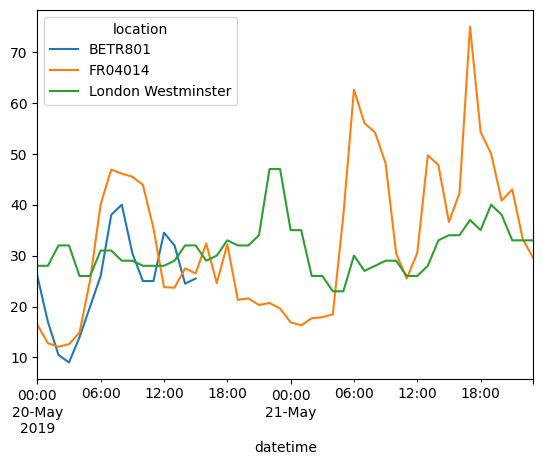

In [56]:
# 可以直接用日期进行indexing
no_2["2019-05-20":"2019-05-21"].plot()

In [57]:
# 对于时间格式的index可以采用resample()函数，切换时间格式，实现类似groupby的效果
# 例如'M'指每月, '5H'指5小时, 'D'代表每天
# 和groupby一样，需要一个aggregate function
monthly_max = no_2.resample("5H").max()
monthly_max.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 00:00:00+00:00,50.5,61.9,23.0
2019-05-07 05:00:00+00:00,NaN,77.7,32.0
2019-05-07 10:00:00+00:00,NaN,20.1,21.0
2019-05-07 15:00:00+00:00,NaN,26.8,21.0
2019-05-07 20:00:00+00:00,NaN,36.2,24.0


### 文字类数据处理

In [58]:
# 根据分隔符切割字符串并提取
titanic["Name"].str.split(",").str.get(0)

0      anonymous
1      anonymous
2      anonymous
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

In [59]:
# 其他操作：
# 大小写切换：titanic["Name"].str.lower()
# 关键词查询：titanic["Name"].str.contains("Countess")
# 字符串长度：titanic["Name"].str.len()
# 字符串长度最大值索引：titanic["Name"].str.len().idxmax()
# 字符串替换：titanic["Sex"].replace({"male": "M", "female": "F"})

### 画图

In [5]:
# 调包
import matplotlib.pyplot as plt

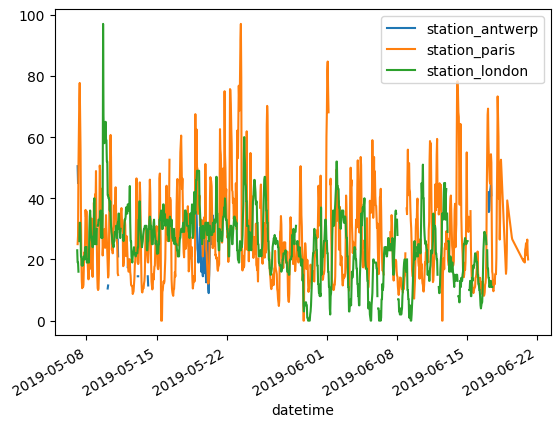

In [6]:
# 简易制图
# plot()函数默认为每一个numerical column画出一条plot
air_quality = pd.read_csv("air_quality_no2.csv", index_col=0, parse_dates=True)
air_quality.plot()
plt.show()

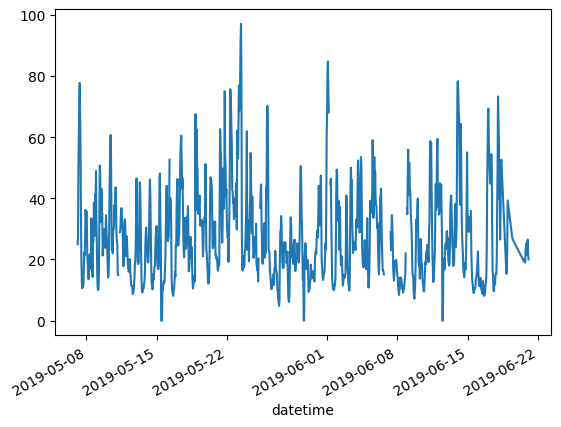

In [7]:
# 对一列数据进行制图
air_quality['station_paris'].plot()
plt.show()

In [8]:
# pyplot提供的图表类型
[
    method_name
    for method_name in dir(air_quality.plot)
    if not method_name.startswith("_")
]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

<AxesSubplot: ylabel='Frequency'>

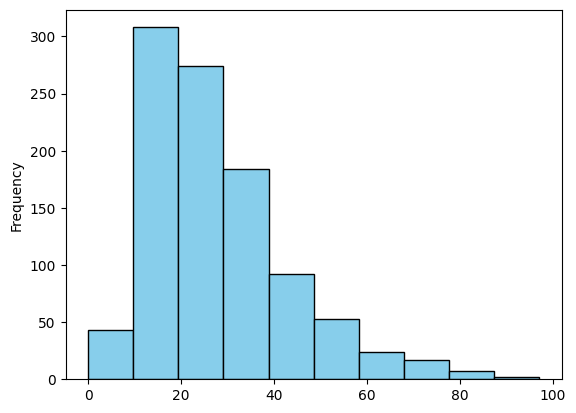

In [13]:
# histograam
air_quality['station_paris'].plot.hist(bins=10, color='skyblue', edgecolor='black')

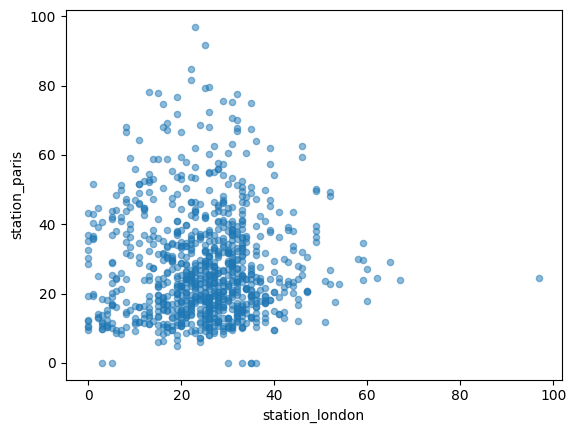

In [65]:
# 散点图
air_quality.plot.scatter(x='station_london', y='station_paris', alpha=0.5)
plt.show()

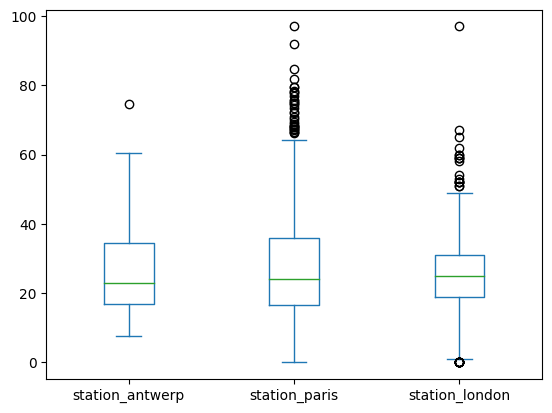

In [66]:
# 盒形图
air_quality.plot.box()
plt.show()

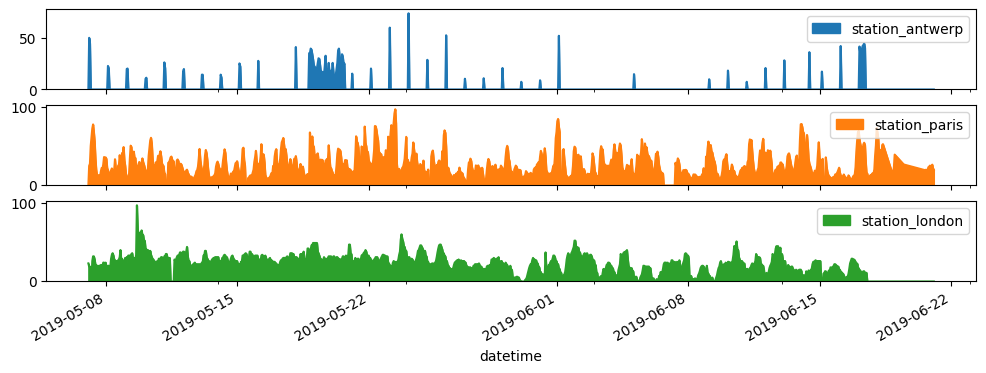

In [67]:
# Subplot
axs = air_quality.plot.area(figsize=(12, 4), subplots=True)
plt.show()

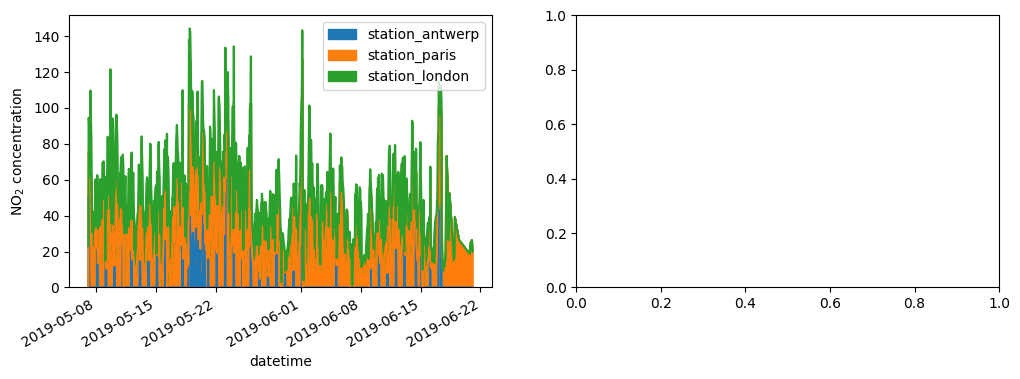

In [68]:
# 设置subplot。此处设置1,2意为有2个subplot，figsize为大小
# subplots()函数返回fig（指总图片区域）以及axs（是包含了每个subplot的array）
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# 画area图，指定使用上述axs的第一个subplot作为画图区域
air_quality.plot.area(ax=axs[0])

# 设置第一个subplot的y轴名称
axs[0].set_ylabel("NO$_2$ concentration")

# 存图
fig.savefig("no2_concentrations.png")
plt.show()

In [69]:
# 画图格式参数
# 图例：df.plot(legend=False)
# styles: '-', '--', '-.', ':', 'o', '-o', 's', '*', '+', '.'
# 设置横纵坐标名称：df.plot(xlabel="new x", ylabel="new y")
# y轴变为log scale: ts.plot(logy=True)
# 左右同时显示y轴：df["B"].plot(secondary_y=True, style="g")
# subplot参数（布局、共享x轴）：df.plot(subplots=True, layout=(2, 3), figsize=(6, 6), sharex=False);

### 新增、修改列

In [70]:
# 根据现有列，创建新列
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882
air_quality["ratio_paris_antwerp"] = (
    air_quality["station_paris"] / air_quality["station_antwerp"]
)
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [71]:
# 重命名列
air_quality_renamed = air_quality.rename(
    columns={
        "station_antwerp": "BETR801",
        "station_paris": "FR04014",
        "station_london": "London Westminster",
    }
)

# rename()函数也接受mapping函数作为输入值
air_quality_renamed = air_quality_renamed.rename(columns=str.lower)
air_quality_renamed.head(5)

,betr801,fr04014,london westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [73]:
# 删除列: titanic.drop(columns = ['Sex', 'Age]')
# 去除重复的行：titanic.drop_duplicates()

### 导出文件

In [72]:
# 转化为excel导出
# index=False表示不显示row index
# 同理可以读取excel文件
titanic.to_excel("titanic.xlsx", sheet_name="passengers", index=False)
titanic = pd.read_excel("titanic.xlsx", sheet_name="passengers")